In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import os
import sys

### First I want to load in and do a time lapse curvature plot

In [27]:
fnames = [
    "im01",
    "im02",
    "im03",
    "im04",
    "im05",
    "im06",
    "im07",
    "im08",
    "im09",
    "im10",
    "im11",
    "im12",
    "im13",
]
fnames = ["bi26_g54e/extracted_data/" + s + ".npz" for s in fnames]

In [28]:
# format is cropped image, interpolated line, interpolation points, curvature, and crop points!
cropped_images = []
interpolated_lines = []
interpolation_points = []
curvatures = []
crop_points = []

In [29]:
for f in fnames:
    arr = np.load(f)
    cropped_images.append(arr["arr_0"])
    interpolated_lines.append(arr["arr_1"])
    interpolation_points.append(arr["arr_2"])
    curvatures.append(arr["arr_3"])
    crop_points.append(arr["arr_4"])

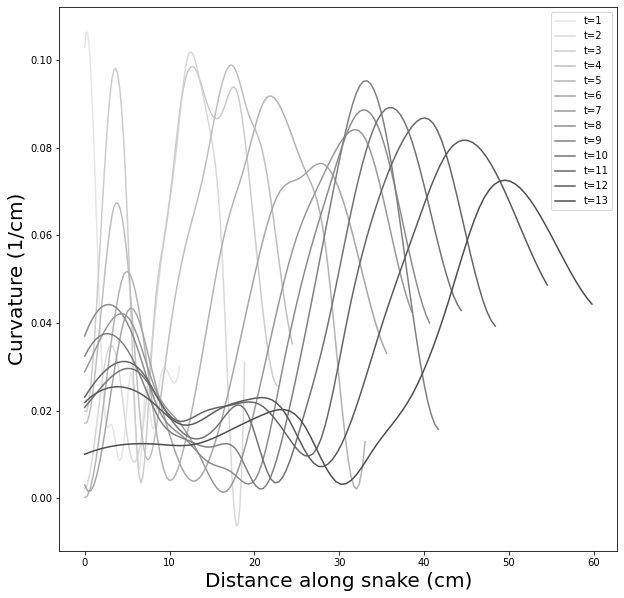

In [30]:
plt.figure(figsize=(10, 10))
for i in range(len(cropped_images)):
    plt.plot(
        interpolation_points[i],
        curvatures[i],
        label=f"t={i+1}",
        color=(0.9 - i / 20, 0.9 - i / 20, 0.9 - i / 20),
    )

plt.legend()
plt.xlabel("Distance along snake (cm)", fontsize=20)
plt.ylabel("Curvature (1/cm)", fontsize=20)
# plt.show()
plt.savefig("time_lapse.png")

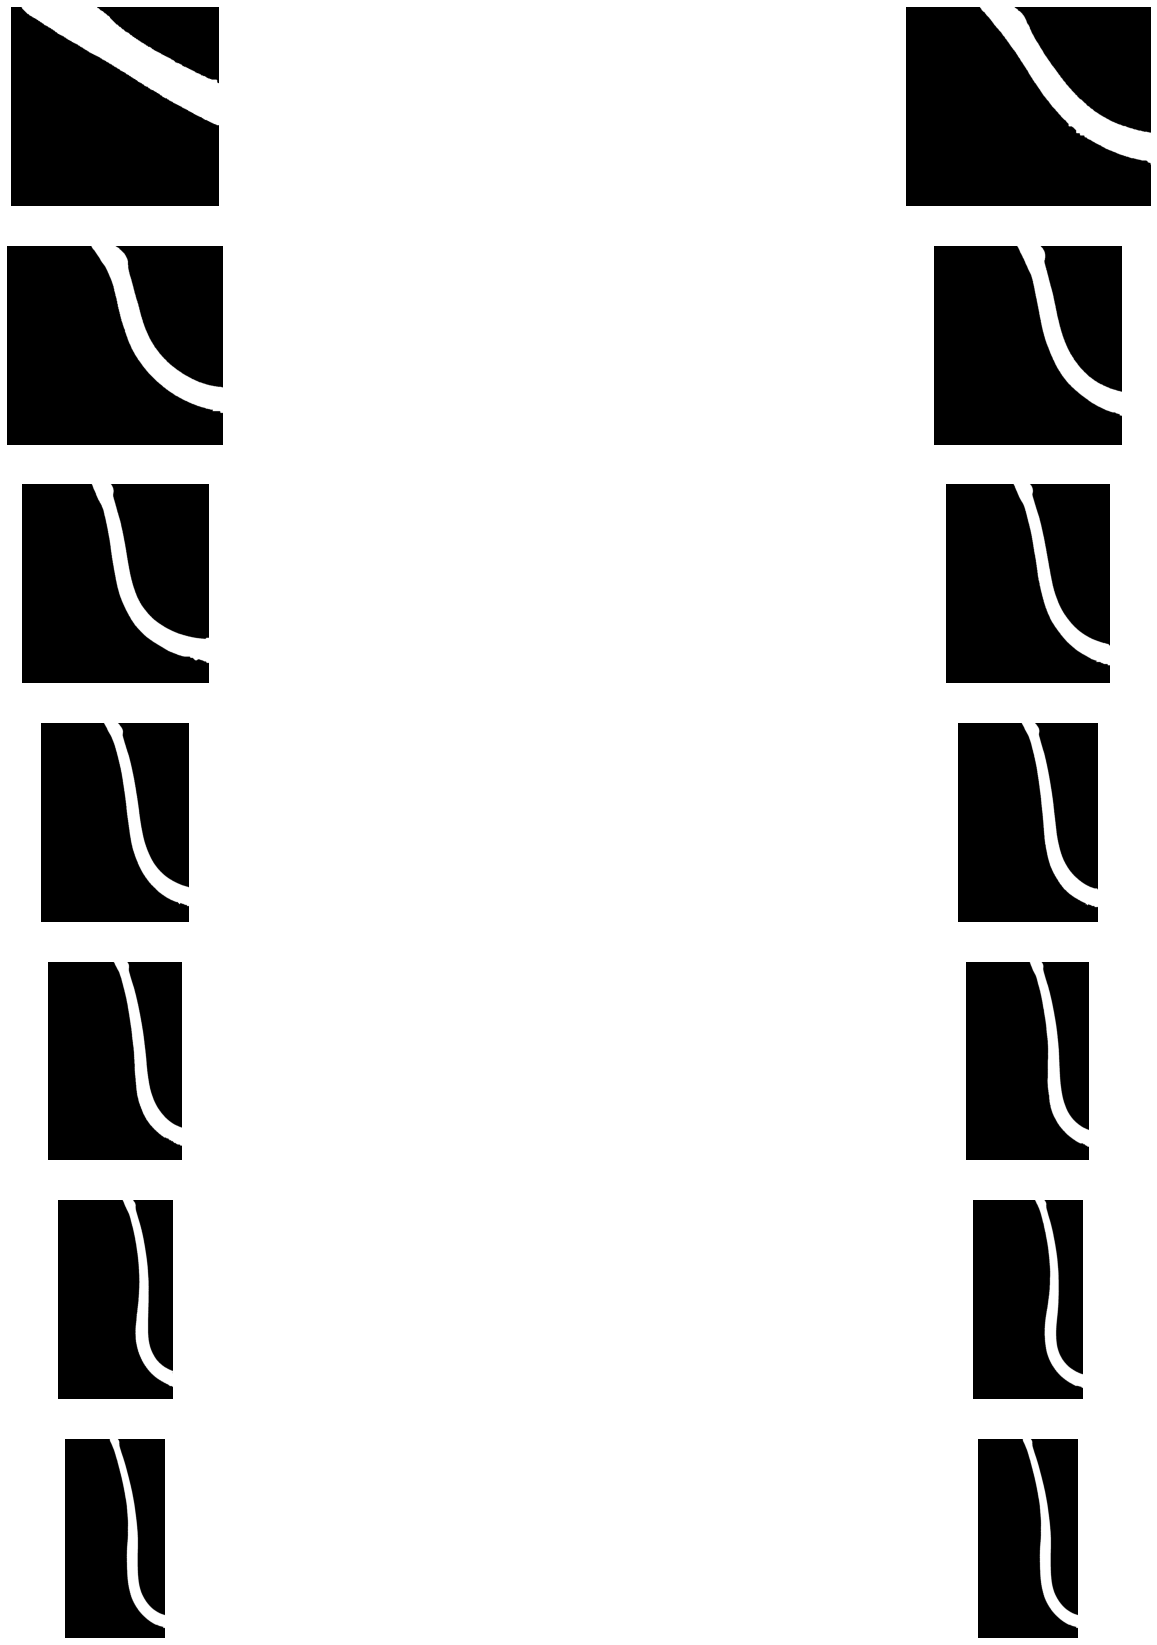

In [35]:
fig, ax = plt.subplots(7, 2, figsize=(30, 30))
for i in range(len(cropped_images)):
    row = math.floor(i / 2)
    if i % 2 == 0:
        ax[row, 0].imshow(cropped_images[i], cmap="gray")
        ax[row, 0].axis("off")
    else:
        ax[row, 1].imshow(cropped_images[i], cmap="gray")
        ax[row, 1].axis("off")
    if i == 12:
        ax[row, 1].imshow(cropped_images[i], cmap="gray")
        ax[row, 1].axis("off")
# plt.show()
plt.savefig("time_snake_viz.png")

In [33]:
interp_mat = np.vstack(interpolation_points)
curve_mat = np.vstack(curvatures)

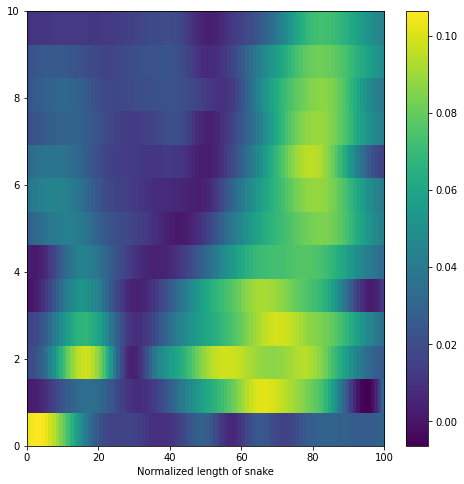

In [34]:
plt.figure(figsize=(8, 8))
plt.imshow(curve_mat[::], extent=(0, 100, 0, 10), aspect="auto", origin="lower")
plt.colorbar()
plt.xlabel("Normalized length of snake")
# plt.show()
plt.savefig("time_kymograph.png")

In [ ]:
times = np.arange(0, 11, 1)

In [ ]:
xyz = list(zip(interpolation_points, times, curvatures))

In [ ]:
from scipy.interpolate import interp2d

# f will be a function with two arguments (x and y coordinates),
# but those can be array_like structures too, in which case the
# result will be a matrix representing the values in the grid
# specified by those arguments
f = interp2d(x_list, y_list, z_list, kind="linear")

x_coords = np.arange(min(x_list), max(x_list) + 1)
y_coords = np.arange(min(y_list), max(y_list) + 1)
Z = f(x_coords, y_coords)

fig = plt.imshow(
    Z, extent=[min(x_list), max(x_list), min(y_list), max(y_list)], origin="lower"
)